当前tensorflow版本 2.0.0
训练集总图片数： (60000, 28, 28)
训练集中标签数: 60000
标签取值： [9 0 0 ... 3 0 5]
测试集总图片数： (10000, 28, 28)
测试集标签数： 10000


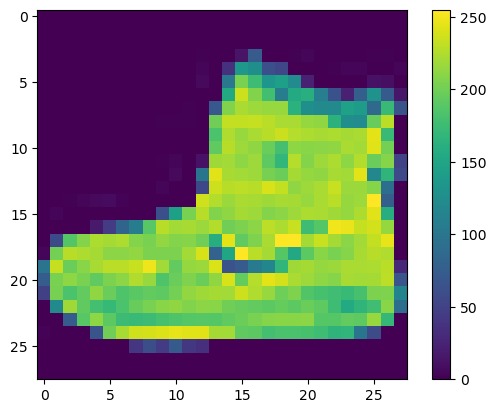

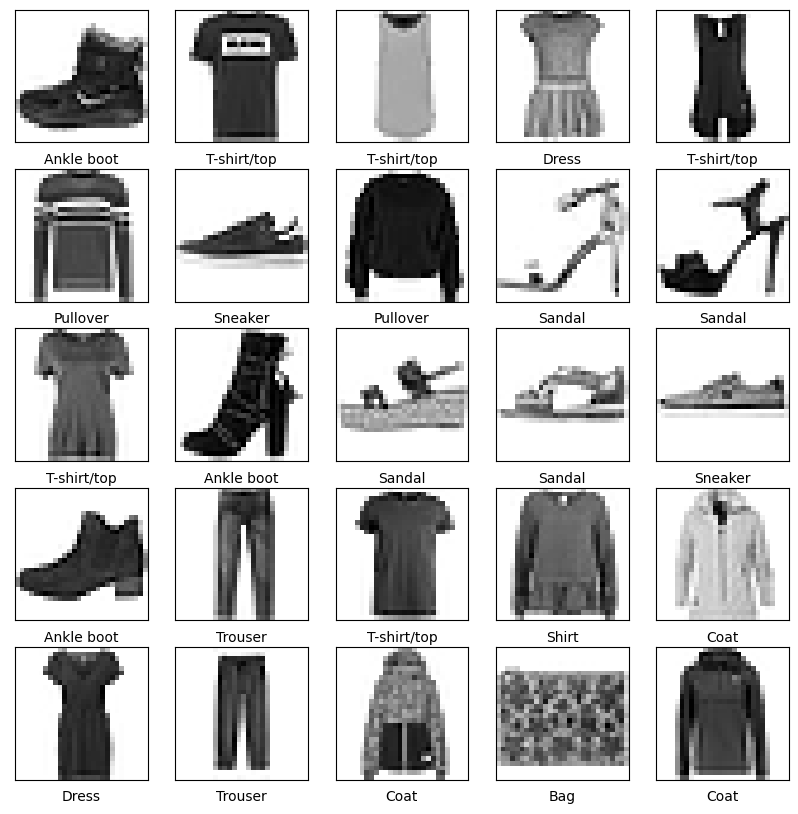

Train on 60000 samples
Epoch 1/10
   32/60000 [..............................] - ETA: 19:03

InternalError:  Blas GEMM launch failed : a.shape=(32, 128), b.shape=(128, 10), m=32, n=10, k=128
	 [[node sequential/dense_1/MatMul (defined at d:\Anaconda\envs\tf200\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_631]

Function call stack:
distributed_function


In [1]:
# 本程序基于TensorFlow训练了一个神经网络模型来对运动鞋和衬衫等衣物的图像进行分类。
# 使用tf.keras （高级API）在TensorFlow中构建和训练模型。
 
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))
# 查看当前tensorflow版本
print("当前tensorflow版本", tf.__version__)
 
# 【1 导入Fashion MNIST数据集】
'''
加载数据集将返回四个NumPy数组：
train_images和train_labels数组是训练集 ，即模型用来学习的数据。
针对测试集 ， test_images和test_labels数组对模型进行测试 
'''
'''
图像是28x28 NumPy数组，像素值范围是0到255。 标签是整数数组，范围是0到9。这些对应于图像表示的衣服类别 ：
标签	    类
0	    T恤
1	    裤子
2	    套衫/卫衣
3	    连衣裙
4	    外衣/外套
5	    凉鞋
6	    衬衫
7	    运动鞋
8	    袋子
9	    短靴/脚踝靴
'''
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
 
# 每个图像都映射到一个标签
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 
 
# 【2 探索数据】
# 在训练模型之前，让我们探索数据集的格式。下图显示了训练集中有60,000张图像，每个图像表示为28 x 28像素
print("训练集总图片数：", train_images.shape)
 
# 训练集中有60,000个标签
print("训练集中标签数:", len(train_labels))
 
# 每个标签都是0到9之间的整数
print("标签取值：", train_labels)
 
# 测试集中有10,000张图像。同样，每个图像都表示为28 x 28像素
print("测试集总图片数：", test_images.shape)
 
# 测试集包含10,000个图像标签
print("测试集标签数：", len(test_labels))
 
 
# 【3 预处理数据】
# 在训练网络之前，必须对数据进行预处理。如果检查训练集中的第一张图像，将看到像素值落在0到255的范围内
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
 
# 将这些值缩放到0到1的范围，然后再将其输入神经网络模型。为此，将值除以255。以相同的方式预处理训练集和测试集非常重要：
train_images = train_images / 255.0
test_images = test_images / 255.0
 
#为了验证数据的格式正确，并且已经准备好构建和训练网络，让我们显示训练集中的前25张图像，并在每张图像下方显示班级名称。
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
 
# 【4 建立模型】
# 建立神经网络需要配置模型的各层，然后编译模型
# 搭建神经网络结构 神经网络的基本组成部分是层 。图层（神经网络结构）从输入到其中的数据中提取表示
# 深度学习的大部分内容是将简单的层链接在一起。大多数层（例如tf.keras.layers.Dense ）具有在训练期间学习的参数。
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
 
'''
编译模型
在准备训练模型之前，需要进行一些其他设置。这些是在模型的编译步骤中添加的：
损失函数 -衡量训练期间模型的准确性。您希望最小化此功能，以在正确的方向上“引导”模型。
优化器 -这是基于模型看到的数据及其损失函数来更新模型的方式。
指标 -用于监视培训和测试步骤。以下示例使用precision ，即正确分类的图像比例。
'''
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
 
# 【5 训练模型】
'''
训练神经网络模型需要执行以下步骤：
1.将训练数据输入模型。在此示例中，训练数据在train_images和train_labels数组中。
2.该模型学习关联图像和标签。
3.要求模型对测试集进行预测（在本示例中为test_images数组）。
4.验证预测是否与test_labels数组中的标签匹配。
'''
# 要开始训练，请调用model.fit方法，之所以这么称呼是因为它使模型“适合”训练数据：
model.fit(train_images, train_labels, epochs=10)
 
# 比较模型在测试数据集上的表现
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
 
# 作出预测 通过训练模型，您可以使用它来预测某些图像。模型的线性输出logits 。附加一个softmax层，以将logit转换为更容易解释的概率。
probability_model = tf.keras.Sequential([model,  tf.keras.layers.Softmax()])
 
predictions = probability_model.predict(test_images)
 
print(predictions[0])
 
print(np.argmax(predictions[0]))
print(test_labels[0])
 
# 以图形方式查看完整的10个类预测。
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
 
  plt.imshow(img, cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
 
'''验证预测
通过训练模型，您可以使用它来预测某些图像。
让我们看一下第0张图像，预测和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。该数字给出了预测标签的百分比（满分为100）。'''
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
 
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
 
# 绘制一些带有预测的图像
# 绘制前X张测试图像，它们的预测标签和真实标签。
# 将正确的预测颜色设置为蓝色，将不正确的预测颜色设置为红色。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
 
# 【6 使用训练有素的模型】
# 使用经过训练的模型对单个图像进行预测。
# 从测试数据集中获取图像。
img = test_images[0]
 
# 将图像添加到唯一的批处理
img = (np.expand_dims(img,0))
 
# 为该图像预测正确的标签：
predictions_single = probability_model.predict(img)
print("输出每一个标签的把握：", predictions_single)  # 一共10个标签，索引从0，1，2到9
 
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
 
# keras.Model.predict返回一个列表列表-数据批次中每个图像的一个列表。批量获取我们（仅）图像的预测
print("模型预测的结果：", np.argmax(predictions_single[0]))
 
 